## General instructions

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel/runtime** (Colab: in the menubar, select *Runtime*$\rightarrow$*Factory Reset Runtime*; Jupyter: in the menubar, select *Kernel*$\rightarrow$*Restart*) and then **run all cells** (Colab: in the menubar, select *Runtime*$\rightarrow$*Run all*; Jupyter: in the menubar, select *Cell*$\rightarrow$*Run All*).

Make sure you fill in any place that says `YOUR CODE HERE` or `"YOUR ANSWER HERE"`, as well as the list of the group members in the following cell.

Enter here the *Group Name* and the list of *Group Members*.

`Doi eletronics`

`Burco Lorenzo, Persello Riccardo`

In order to be able to have an evaluation DO NOT delete/cut the cells with code and answers. Once you have finished you can downolad the notebook (Colab: in the menubar, select *File*$\rightarrow$*Download .ipynb*; Jupyter: in the menubar, select *File*$\rightarrow$*Download as*$\rightarrow$*Notebook (.ipynb)*) and upload as an assignment on the e-learning platform.

The following cell will load the Google Drive extension for the current notebook, when the variable `MOUNT` is `True`. This allow you to mount the Google Drive filesystem for file persistence. The mountpoint will be `/content/gdrive`.
Furthermore, it will set the `PATH` variable, from now on, so that if you have to refer to external files you could do that by writing:

```python
os.path.join(PATH, filename)
```

This will append the filename after the specific PATH.

In [12]:
import os
MOUNT = False
if 'google.colab' in str(get_ipython()) and MOUNT:
    from google.colab import drive
    drive.mount('/content/gdrive')
    PATH = '/content/gdrive/MyDrive'
else:
    PATH = '.'

# Important warning

**⚠️ avoid copying, removing or modifying test cells, if you do that your assignment might be graded wrongly ⚠️**

---

# Pandas

This notebooks contains a few exercises about the `pandas` library, mainly with dataframes. Let's first import a few data (feel free to modify the following cell to fit with your settings (e.g., colab). 

The three datasets below refer to some data about real estate in a given US state.

In [13]:
import pandas as pd
import numpy as np

df_space = pd.read_csv('zillow_space.csv', index_col=None)
df_zip = pd.read_csv('zillow_zip.csv', index_col=None)
df_price = pd.read_csv('zillow_price.csv', index_col=None, parse_dates=['BuiltIn'])

display(df_space.head())
display(df_zip.head())
display(df_price.head())

,PropertyName,LivingSpace,Beds,Baths
0,prop0,2222,3,3.5
1,prop1,1628,3,2.0
2,prop2,3824,5,4.0
3,prop3,1137,3,2.0
4,prop4,3560,6,4.0


,PropertyName,Zip
0,prop0,32312
1,prop1,32308
2,prop2,32312
3,prop3,32309
4,prop4,32309


,PropertyName,ListPrice,BuiltIn
0,prop0,250000,1994-05-14 02:15:00
1,prop1,185000,2003-09-27 17:25:00
2,prop2,399000,2013-08-13 07:43:00
3,prop3,150000,2011-08-08 00:25:00
4,prop4,315000,1983-05-07 17:17:00


# Exercise 1

We'd like to merge the three data frame into a single one. You are required to perform the merge of `df_space`, `df_zip`, and `df_price` into `df_origin` by property name.

In [14]:
# YOUR CODE HERE
df_origin = df_space.merge(df_zip, 'inner', 'PropertyName').merge(df_price, 'inner', 'PropertyName')
display(df_origin.head())
print(df_origin.shape)

,PropertyName,LivingSpace,Beds,Baths,Zip,ListPrice,BuiltIn
0,prop0,2222,3,3.5,32312,250000,1994-05-14 02:15:00
1,prop1,1628,3,2.0,32308,185000,2003-09-27 17:25:00
2,prop2,3824,5,4.0,32312,399000,2013-08-13 07:43:00
3,prop3,1137,3,2.0,32309,150000,2011-08-08 00:25:00
4,prop4,3560,6,4.0,32309,315000,1983-05-07 17:17:00


(20, 7)


In [15]:
assert df_origin.shape == (20, 7)

# Exercise 2

Perform the following:

- set `PropertyName` as  being the index of the pandas `df`
- print the first 3 rows of the pandas
- print the fist 3 columns of the pandas 


In [16]:
df = df_origin.copy()
df.set_index('PropertyName')

display(df[:3])
display(df.loc[:, 'PropertyName':'Beds'])

,PropertyName,LivingSpace,Beds,Baths,Zip,ListPrice,BuiltIn
0,prop0,2222,3,3.5,32312,250000,1994-05-14 02:15:00
1,prop1,1628,3,2.0,32308,185000,2003-09-27 17:25:00
2,prop2,3824,5,4.0,32312,399000,2013-08-13 07:43:00


,PropertyName,LivingSpace,Beds
0,prop0,2222,3
1,prop1,1628,3
2,prop2,3824,5
3,prop3,1137,3
4,prop4,3560,6
5,prop5,2893,4
6,prop6,3631,4
7,prop7,2483,4
8,prop8,2400,4
9,prop9,1997,3


# Exercise 3

Futher transformations are also meaningful:

- transform the `LivingSpace` column from square feet to square meters (divide it by 10,764) and round it to two decimal places
- add 1 to all `Beds`
- multiply `ListPrice` by 1.34 to account for price inflation and transform it to integer values
- transform the property name from `prop0`, `prop1` etc. to `Property No 0`, `Property No 1`, etc.

In [17]:
df = df_origin.copy()
df['LivingSpace'] = round(df['LivingSpace']/10.764, 2)
df['Beds'] = df['Beds'] + 1
df['ListPrice'] = (df['ListPrice'] * 1.34).astype(int)
df['PropertyName'] = df['PropertyName'].replace('prop', 'Property No ', regex=True)

display(df_origin.head())
display(df.head())
print(df.shape)

,PropertyName,LivingSpace,Beds,Baths,Zip,ListPrice,BuiltIn
0,prop0,2222,3,3.5,32312,250000,1994-05-14 02:15:00
1,prop1,1628,3,2.0,32308,185000,2003-09-27 17:25:00
2,prop2,3824,5,4.0,32312,399000,2013-08-13 07:43:00
3,prop3,1137,3,2.0,32309,150000,2011-08-08 00:25:00
4,prop4,3560,6,4.0,32309,315000,1983-05-07 17:17:00


,PropertyName,LivingSpace,Beds,Baths,Zip,ListPrice,BuiltIn
0,Property No 0,206.43,4,3.5,32312,335000,1994-05-14 02:15:00
1,Property No 1,151.24,4,2.0,32308,247900,2003-09-27 17:25:00
2,Property No 2,355.26,6,4.0,32312,534660,2013-08-13 07:43:00
3,Property No 3,105.63,4,2.0,32309,201000,2011-08-08 00:25:00
4,Property No 4,330.73,7,4.0,32309,422100,1983-05-07 17:17:00


(20, 7)


In [18]:
assert df.shape == (20, 7)
assert df['LivingSpace'].max() == 454.48 and  df['LivingSpace'].min() == 104.79
assert df['Beds'].max() == 7 and  df['Beds'].min() == 3
assert df['ListPrice'].max() == 1071866 and  df['ListPrice'].min() == 119260
assert df['PropertyName'].values[2] == 'Property No 2'

# Exercise 4

- transform the `BuiltIn` column into 3 columns containing the year, month, and day of construction

In order to access the datetime object from a column you can use the [`.dt`](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dt-accessors) accessor. Look at the documentation.

In [19]:
df = df_origin.copy()
df['year'] = df['BuiltIn'].dt.year
df['month'] = df['BuiltIn'].dt.month
df['day'] = df['BuiltIn'].dt.day

display(df.head())
print(df.shape)

,PropertyName,LivingSpace,Beds,Baths,Zip,ListPrice,BuiltIn,year,month,day
0,prop0,2222,3,3.5,32312,250000,1994-05-14 02:15:00,1994,5,14
1,prop1,1628,3,2.0,32308,185000,2003-09-27 17:25:00,2003,9,27
2,prop2,3824,5,4.0,32312,399000,2013-08-13 07:43:00,2013,8,13
3,prop3,1137,3,2.0,32309,150000,2011-08-08 00:25:00,2011,8,8
4,prop4,3560,6,4.0,32309,315000,1983-05-07 17:17:00,1983,5,7


(20, 10)


In [20]:
assert df.shape == (20, 10)
assert df['year'].values[2] == 2013
assert df['month'].values[2] == 8
assert df['day'].values[2] == 13

# Exercise 5

- compute the mean and standard deviation of the `Baths` column, and do the same for the `ListPrice` column, grouped by number of Beds, and count the occurencies in each class
- flatten the resulting MultiIndex in the columns into a single column index

In [21]:

df = df_origin.copy()
df = df.groupby(['Beds'])[['ListPrice', 'Baths', 'Beds']].agg({'Baths': ['mean', 'std'], 'ListPrice': ['mean', 'std'], 'Beds': ['count']})
display(df)

df_flattened = df.copy()
df_flattened.columns = df_flattened.columns.get_level_values(0)
df_flattened.columns = ['Baths_mean', 'Baths_std', 'ListPrice_mean', 'ListPrice_std', 'Beds_count']
display(df_flattened)

Baths                ListPrice                 Beds
          mean       std           mean            std count
Beds                                                        
2     1.000000       NaN   89000.000000            NaN     1
3     2.357143  0.626783  220428.571429   85467.064110     7
4     3.571429  0.786796  501142.857143  172310.213057     7
5     4.250000  1.258306  553450.000000  175526.265841     4
6     4.000000       NaN  315000.000000            NaN     1

,Baths_mean,Baths_std,ListPrice_mean,ListPrice_std,Beds_count
Beds,,,,,
2,1.000000,NaN,89000.000000,NaN,1
3,2.357143,0.626783,220428.571429,85467.064110,7
4,3.571429,0.786796,501142.857143,172310.213057,7
5,4.250000,1.258306,553450.000000,175526.265841,4
6,4.000000,NaN,315000.000000,NaN,1


`df` should look like this:
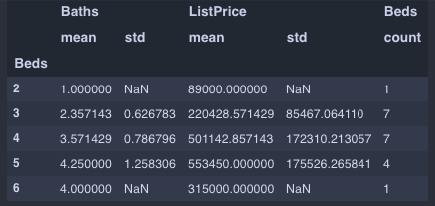

`df_flattened` should look like this:
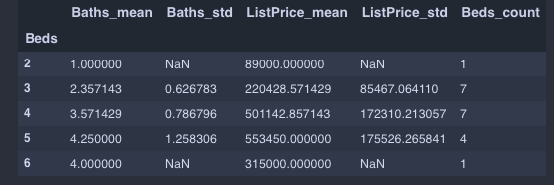

In [22]:
assert df.shape == (5, 5)
assert (df.columns[0]) == ('Baths', 'mean')
assert (df.columns[1]) == ('Baths', 'std')
assert (df_flattened.columns[1]) == 'Baths_std'

# Exercise 6

Add a column `Sum` in the dataframe which is in the format `the house has X Baths and Y Beds`. 

The [`.apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html?highlight=apply#pandas.DataFrame.apply) function might be useful to this aim.

In [23]:

def beds_plus_baths(x):
    return f"the house has {x['Baths']} Baths and {x['Beds']} Beds"

df = df_origin.copy()
df['Sum'] = None
df['Sum'] = df.apply(beds_plus_baths, axis=1)
display(df)

,PropertyName,LivingSpace,Beds,Baths,Zip,ListPrice,BuiltIn,Sum
0,prop0,2222,3,3.5,32312,250000,1994-05-14 02:15:00,the house has 3.5 Baths and 3 Beds
1,prop1,1628,3,2.0,32308,185000,2003-09-27 17:25:00,the house has 2.0 Baths and 3 Beds
2,prop2,3824,5,4.0,32312,399000,2013-08-13 07:43:00,the house has 4.0 Baths and 5 Beds
3,prop3,1137,3,2.0,32309,150000,2011-08-08 00:25:00,the house has 2.0 Baths and 3 Beds
4,prop4,3560,6,4.0,32309,315000,1983-05-07 17:17:00,the house has 4.0 Baths and 6 Beds
5,prop5,2893,4,3.0,32312,699000,1982-07-05 11:38:00,the house has 3.0 Baths and 4 Beds
6,prop6,3631,4,3.0,32309,649000,1989-06-18 10:10:00,the house has 3.0 Baths and 4 Beds
7,prop7,2483,4,3.0,32312,399000,1993-03-10 20:29:00,the house has 3.0 Baths and 4 Beds
8,prop8,2400,4,4.0,32312,613000,1989-05-23 09:56:00,the house has 4.0 Baths and 4 Beds
9,prop9,1997,3,3.0,32311,295000,2002-11-09 08:34:00,the house has 3.0 Baths and 3 Beds


In [24]:
assert df['Sum'].values[15] == 'the house has 5.0 Baths and 4 Beds'